<a href="https://colab.research.google.com/github/srimouli04/srimouli04/blob/master/ML_Assignment_2Group40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:**

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

You have to train a KNN classifier to create a model that directly predicts a class for a new data point based on the features.

The project is divided in as per the below Tasks

**Tasks:**


1: Load the dataset and print the metadata in the notebook.

2: Print a heatmap to check NULL values. 

3: Perform splitting of train and test data. 

4: Perform feature scaling on independent variables 

5: Build a classifier model using KNN Classifier algorithm. 

6: Plot elbow curve and retrain your model with optimal K value. 

7: Print confusion matrix and classification report. 

8: Find out the stratified cross validation accuracy.

Ignoring any warnings during package imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Functions


## Evaluation metric functions

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [3]:
def plot_size(length = 12, breadth = 8):
  plt.rcParams['figure.figsize'] = (length,breadth)

In [4]:
def ModelMetrics(df_1,df_2, type,length=2,breadth=2):
  print('Accuracy Score: \n')
  print('On {} data {}'.format(type,accuracy_score(df_1,df_2)*100))
  print('\n')

  print('ROC-AUC-Score = {} \n'.format(roc_auc_score(df_1,df_2)))

  print('Classification report for {} data: \n'.format(type))
  print(classification_report(df_1,df_2))
  print('\n')

  length  = 2 
  breadth = 2

  plot_size(length,breadth)
  fig_title = 'Confusion Matrix for ' + type + ' data'
  sns.heatmap(confusion_matrix(df_1,df_2),annot=True,cmap='Oranges', fmt='g')
  plt.title(fig_title, fontsize = 14)
  plt.tight_layout()
  plt.show()    

In [5]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count

## KNN Model function

We have built this because the same steps are repeated multiple times, the values of neighbours,lf_size and norm are taken as per the default values configured in " kNeighborsClassifier "

In [6]:
def knearestneighbours(dt_typ,prd_features,prd_trg,neighbours=5,lf_size=30,norm=2):
  print('-----------------------------------'+dt_typ+'--------------------------------------------')
  knn = KNeighborsClassifier(n_neighbors=neighbours,leaf_size=lf_size,p=norm)
  knn.fit(scaled_x_train,Y_train)
  prediction = knn.predict(prd_features)
  if dt_typ == '':
    print('Please enter the type of data being validated')
  else:  
    ModelMetrics(prd_trg,prediction,dt_typ)
  print('-----------------------------End_of_evaluation_statistics--------------------------------')
  print('\n')

# Task-1 
##Load the dataset and printing the metadata in the notebook.



## a) Importing and Loading the Dataset

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

In [8]:
classified_df =  pd.read_csv("Classified Data")

##b) Overview of the data

In [9]:
classified_df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
classified_df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

Removing the first column as it just indicates the row number 

In [11]:
classified_df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [12]:
classified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [13]:
classified_df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


#Task-2
## Explanatory Data Analysis

## a)Printing the heatmap to check any null Values

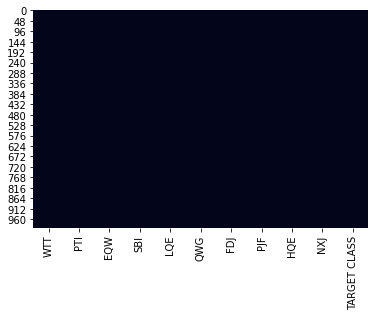

In [14]:
sns.heatmap(classified_df.isnull(), cbar= False)

from the above heat map its clear that we have no missing values hence we are good to proceed

## b) Analysis of data in the columns

In [15]:
for i in list(classified_df):
    print(i +': ' + str(NaN_percent(classified_df,i))+'%')

WTT: 0.0%
PTI: 0.0%
EQW: 0.0%
SBI: 0.0%
LQE: 0.0%
QWG: 0.0%
FDJ: 0.0%
PJF: 0.0%
HQE: 0.0%
NXJ: 0.0%
TARGET CLASS: 0.0%


In [16]:
classified_df.isnull().value_counts()

WTT    PTI    EQW    SBI    LQE    QWG    FDJ    PJF    HQE    NXJ    TARGET CLASS
False  False  False  False  False  False  False  False  False  False  False           1000
dtype: int64

## C) Visualising the data relationships

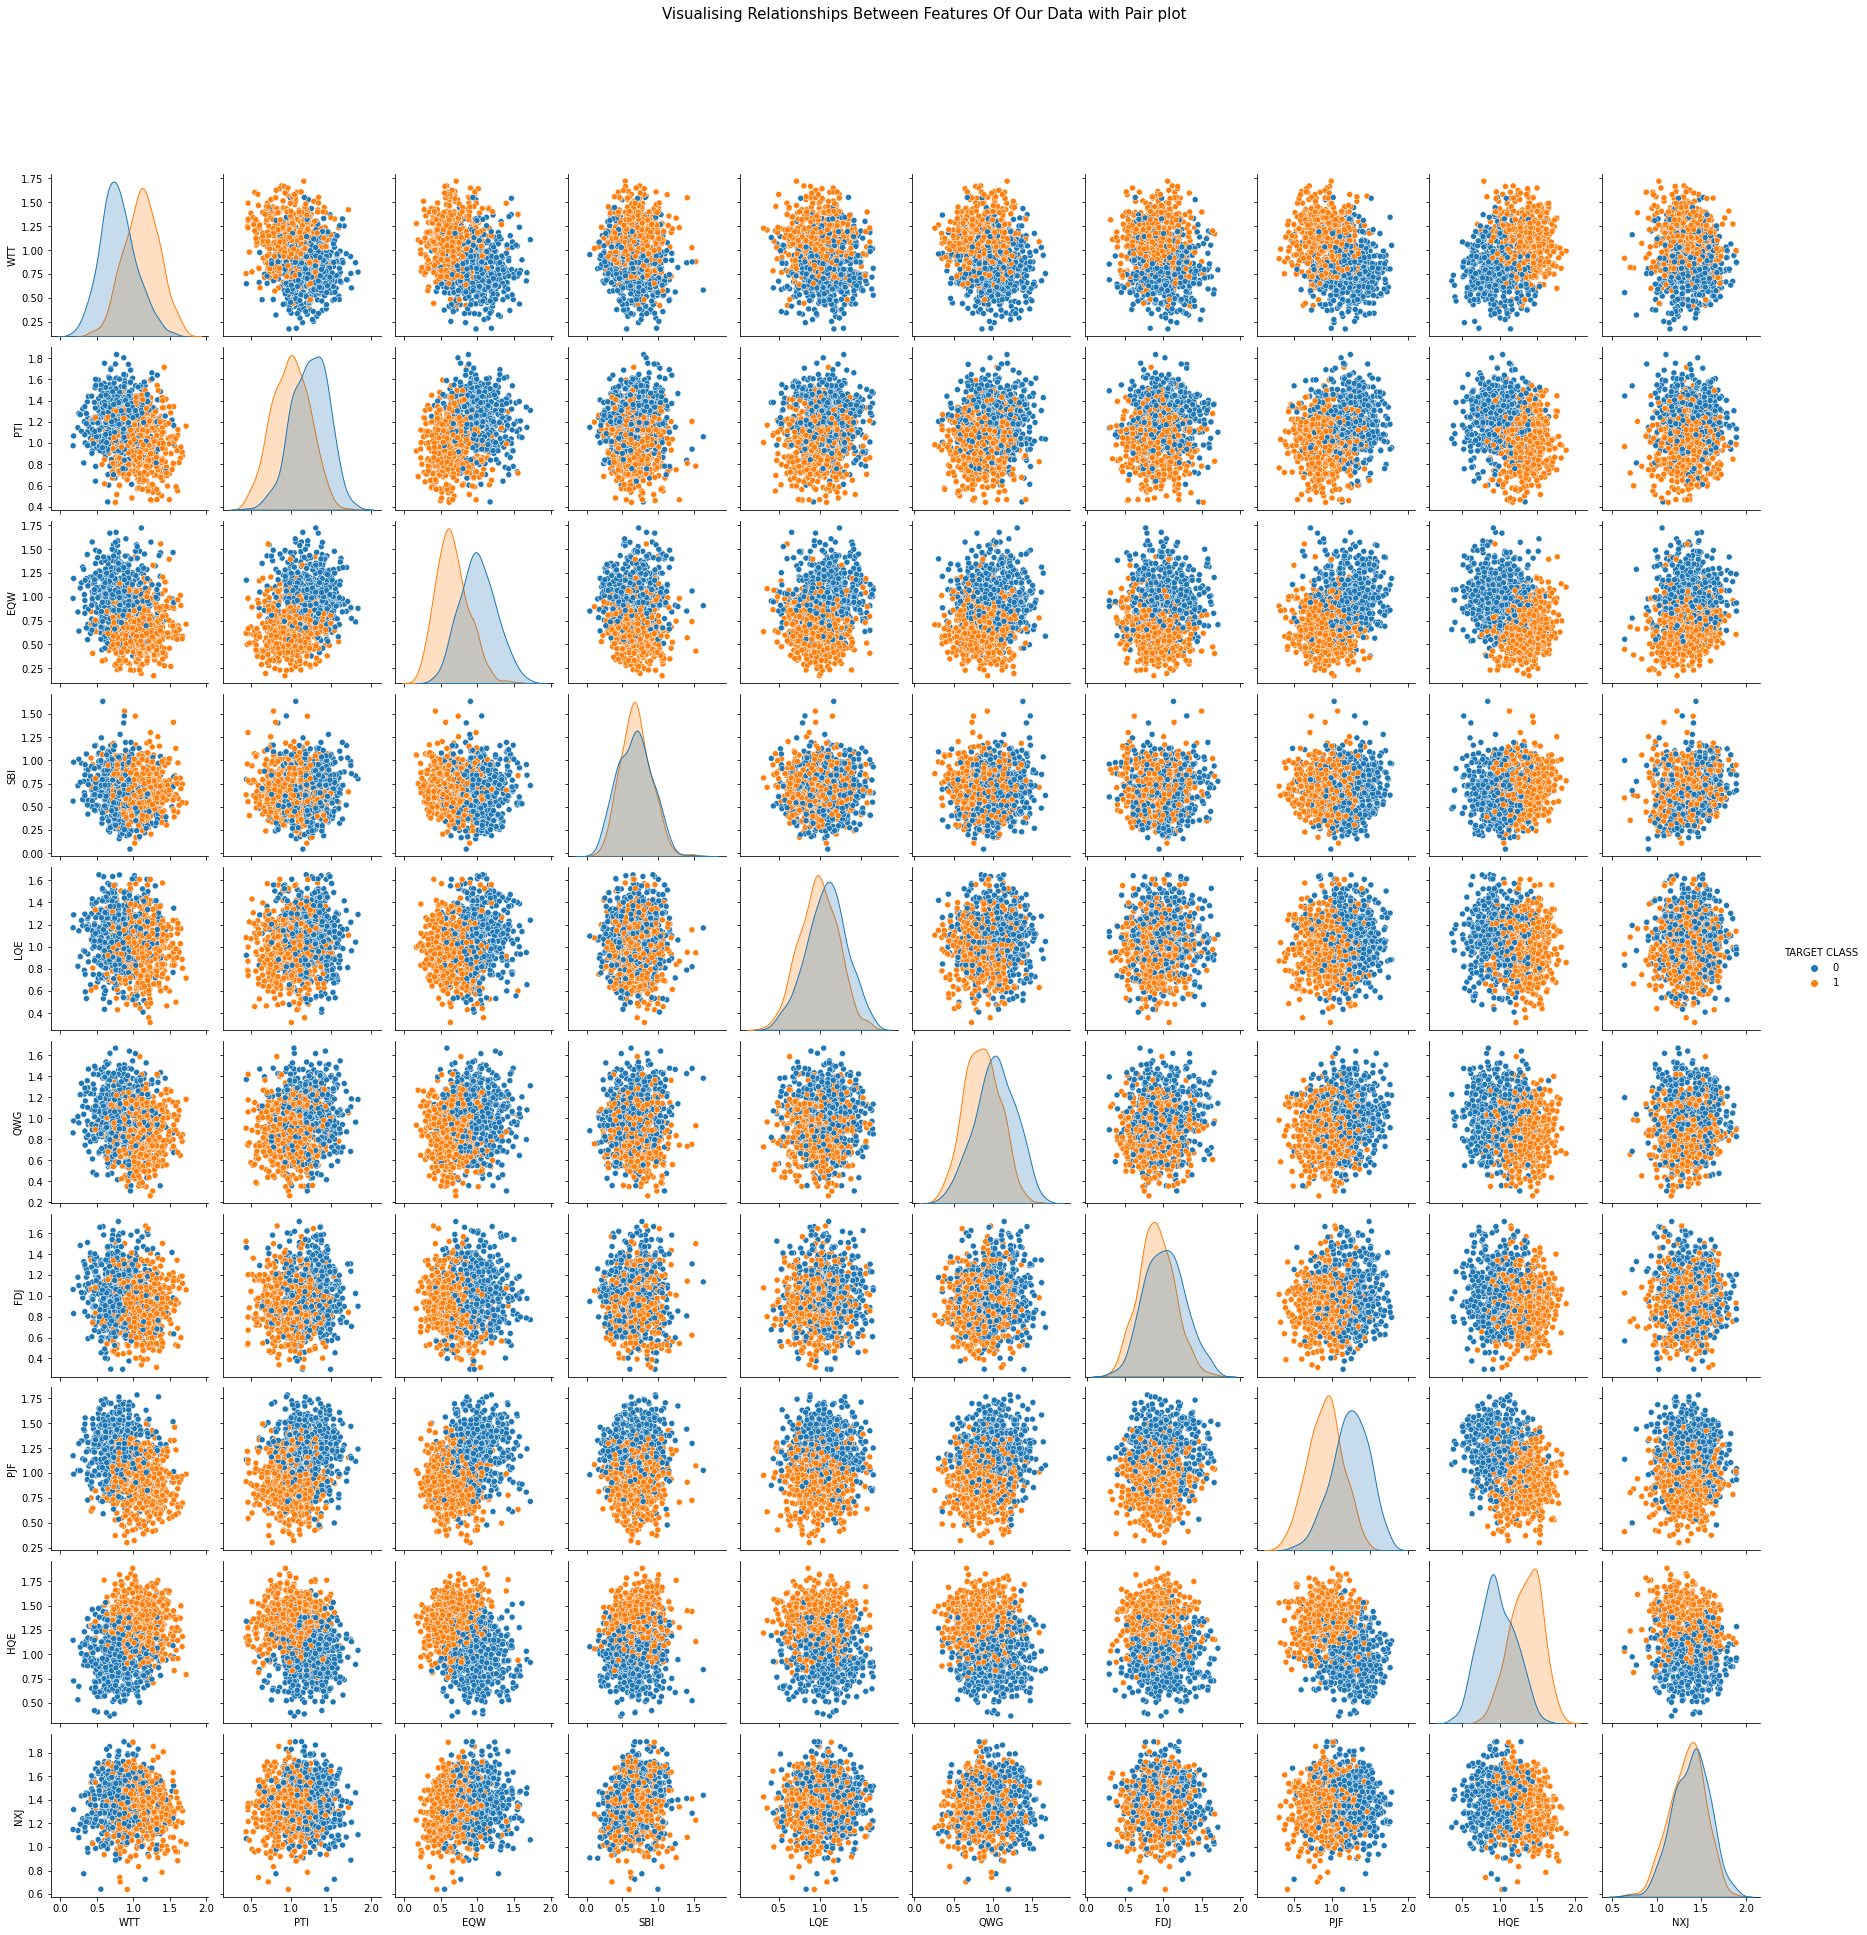

In [17]:
fig_title  = "Visualising Relationships Between Features Of Our Data with Pair plot"
plot = sns.pairplot(classified_df,hue='TARGET CLASS')
plot.fig.suptitle(fig_title, y=1.08, fontsize=15)
plt.show()

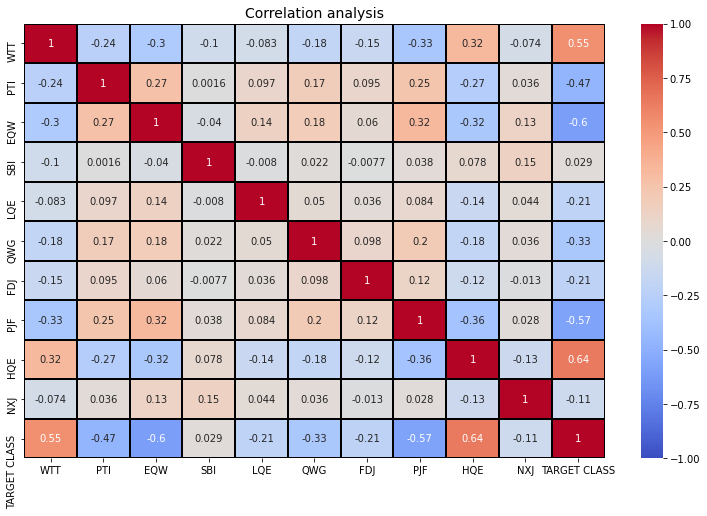

In [18]:
plot_size(13,8)
fig_title = "Correlation analysis"
corr_heatmap = sns.heatmap(classified_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.title(fig_title, fontsize = 14)
plt.show()

from the correlation analysis all the columns are below the general threshold value of correlation = 0.8 hence retaining all the columns

## d) Counts of the classes 

In [19]:
classified_df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

Dataset is perfectly balanced, hence no balancing is needed

#Task-3
##Preparing the test and training dataframes

In [20]:
from sklearn.model_selection import train_test_split

## a)Splitting the data

In [21]:
X_Features = classified_df.iloc[:,0:10]
Y = classified_df.iloc[:,10]

#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_Features,Y,test_size=0.30,random_state=42)

#Train-Validation Split
#X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.25, random_state=42)
 

##b)Shape of the Train, Validation and Test dataframes 

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(700, 10) (300, 10) (700,) (300,)


# Task - 4 
##Standardising the variables



In [23]:
from sklearn.preprocessing import StandardScaler

## a) Scaling the data using Standard Scaler

In [24]:
scaler = StandardScaler().fit(X_train)

In [25]:
scaled_x_train = scaler.transform(X_train)
#scaled_x_val = scaler.transform(X_val)
scaled_x_test = scaler.transform(X_test)

# Task - 5 & 7
## Building the classifier using KNN algorithm
#### The Evaluation metrics such as confusion matrix and classification report are present in the same section

##a)Default model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

-----------------------------------KNN on Training--------------------------------------------
Accuracy Score: 

On KNN on Training data 95.0


ROC-AUC-Score = 0.9501372145447418 

Classification report for KNN on Training data: 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       358
           1       0.94      0.96      0.95       342

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700





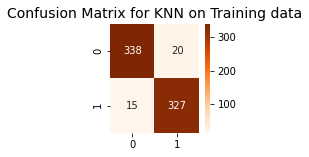

-----------------------------End_of_evaluation_statistics--------------------------------


-----------------------------------KNN on Test--------------------------------------------
Accuracy Score: 

On KNN on Test data 94.66666666666667


ROC-AUC-Score = 0.9468711000178285 

Classification report for KNN on Test data: 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300





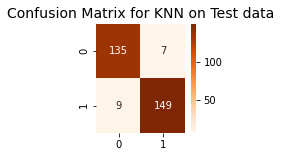

-----------------------------End_of_evaluation_statistics--------------------------------




In [27]:
knearestneighbours('KNN on Training',scaled_x_train,Y_train)
#knearestneighbours('Validation',scaled_x_val,Y_val)
knearestneighbours('KNN on Test',scaled_x_test,Y_test)

##b) Hyper parameter tuning based on results from Validation data

In [28]:
from sklearn.model_selection import RandomizedSearchCV

#Hyperparameters that we want to tune.
leaf_size = list(range(20,30))
n_neighbors = list(range(10,30))
p=list(range(3,5))

hp = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
hyp_knn = KNeighborsClassifier()

#Use GridSearch
clf = RandomizedSearchCV(hyp_knn, hp)

best_model = clf.fit(scaled_x_train,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 27
Best p: 3
Best n_neighbors: 28


##c) Buidling the KNN classifier based on best values obtained in hyper parameter tuning

-----------------------------------HyperParameterTuning applied on Training--------------------------------------------
Accuracy Score: 

On HyperParameterTuning applied on Training data 94.57142857142857


ROC-AUC-Score = 0.9460779509294652 

Classification report for HyperParameterTuning applied on Training data: 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       358
           1       0.93      0.96      0.95       342

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700





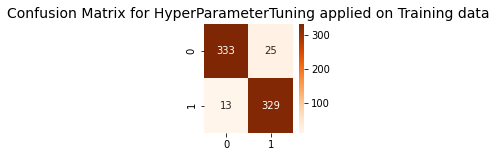

-----------------------------End_of_evaluation_statistics--------------------------------


-----------------------------------HyperParameterTuning applied on Test--------------------------------------------
Accuracy Score: 

On HyperParameterTuning applied on Test data 94.33333333333334


ROC-AUC-Score = 0.9437065430558031 

Classification report for HyperParameterTuning applied on Test data: 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       142
           1       0.95      0.94      0.95       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300





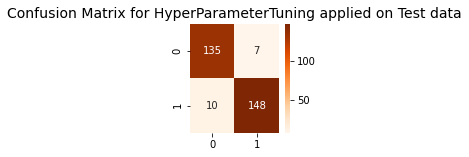

-----------------------------End_of_evaluation_statistics--------------------------------




In [29]:
knearestneighbours('HyperParameterTuning applied on Training',scaled_x_train,Y_train,neighbours=28,lf_size=27,norm=3)
#knearestneighbours('HyperParameterTuning applied on Validation',scaled_x_val,Y_val,neighbours=28,lf_size=27,norm=3)
knearestneighbours('HyperParameterTuning applied on Test',scaled_x_test,Y_test,neighbours=28,lf_size=27,norm=3)

# Task - 6 & 7
## Elbow Method
#### Using this method to determine the number of optimal neighbours for KNN classifier 
#### The Evaluation metrics such as confusion matrix and classification report are present in the same section

##a) Plotting the Elbow Curve

In [30]:
error_rate = []
for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(scaled_x_train, Y_train)
  pred = knn.predict(scaled_x_test)
  error_rate.append(np.mean(pred != Y_test))  

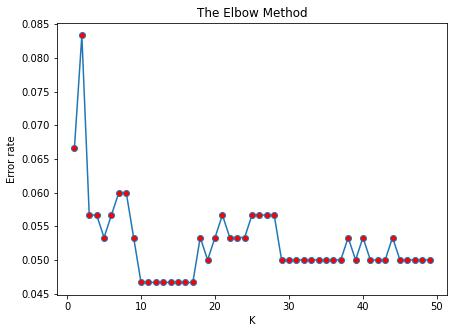

In [31]:
plot_size(7,5)    
plt.plot(range(1, 50), error_rate, marker= "o", markerfacecolor='red')
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [32]:
minerr = min(error_rate) 
bestk = [i for i, j in enumerate(error_rate) if j == minerr][0] +1 
print('Minimum error -> ' + str(minerr)) 
print('Best K Value -> ' + str(bestk))

Minimum error -> 0.04666666666666667
Best K Value -> 10


From the above elbow curve the optimal value of n = 10 as the error rate is lowest at it hence choosing the neighbours = 10

##b) Building the KNN model based on Elbow curve

In [33]:
import sklearn.metrics
knn = KNeighborsClassifier(n_neighbors=12)

##C) Evaluating the Model

-----------------------------------K value from elbow method applied on Training--------------------------------------------
Accuracy Score: 

On K value from elbow method applied on Training data 94.71428571428572


ROC-AUC-Score = 0.9470825574177529 

Classification report for K value from elbow method applied on Training data: 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       358
           1       0.95      0.94      0.95       342

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700





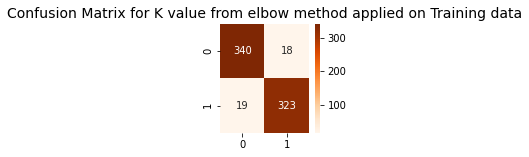

-----------------------------End_of_evaluation_statistics--------------------------------


-----------------------------------K value from elbow method applied on Test--------------------------------------------
Accuracy Score: 

On K value from elbow method applied on Test data 95.33333333333334


ROC-AUC-Score = 0.9539133535389553 

Classification report for K value from elbow method applied on Test data: 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.97      0.94      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300





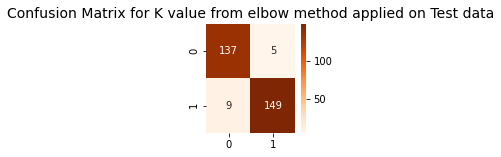

-----------------------------End_of_evaluation_statistics--------------------------------




In [34]:
knearestneighbours('K value from elbow method applied on Training',scaled_x_train,Y_train,neighbours=10)
#knearestneighbours('K value from elbow method applied on Validation',scaled_x_val,Y_val,neighbours=10)
knearestneighbours('K value from elbow method applied on Test',scaled_x_test,Y_test,neighbours=10)

All the evaluations have classification report and Confusion matrix

# Task -8
##Stratified cross validation accuracy


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_Features)

In [36]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev 

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 
lst_accu_stratified = [] 
   

for train_index, test_index in skf.split(X_Features, Y): 
    x_train_fold, x_test_fold = features_scaled[train_index], features_scaled[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold)) 
   
# Print the output. 
print('List of possible accuracies:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', round(max(lst_accu_stratified)*100,2), '%') 
print('\nMinimum Accuracy:', round(min(lst_accu_stratified)*100,2), '%') 
print('\nOverall Accuracy:', round(mean(lst_accu_stratified)*100,2), '%') 
print('\nStandard Deviation is:', round(stdev(lst_accu_stratified),2)) 


List of possible accuracies: [0.94, 0.92, 0.94, 0.92, 0.89, 0.92, 0.93, 0.94, 0.97, 0.95]

Maximum Accuracy That can be obtained from this model is: 97.0 %

Minimum Accuracy: 89.0 %

Overall Accuracy: 93.2 %

Standard Deviation is: 0.02
